<a href="https://colab.research.google.com/github/s26673/POSI_MON1/blob/main/Cwiczenia5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 5

## Wprowadzenie

### Regresja logistyczna

**Regresja logistyczna** to model statystyczny używany do przewidywania
prawdopodobieństwa zajścia zdarzenia (np. $ Y = 1 $) na podstawie jednej lub wielu
zmiennych objaśniających $$ X_1, X_2, \ldots, X_n $$

W przeciwieństwie do regresji liniowej, regresja logistyczna modeluje prawdopodobieństwo
w taki sposób, by zawsze mieściło się w przedziale $[0, 1]$.  

Używa do tego tzw. **funkcji logistycznej (sigmoidalnej)**, zdefiniowanej jako:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$

### Funkcja sigmoidalna

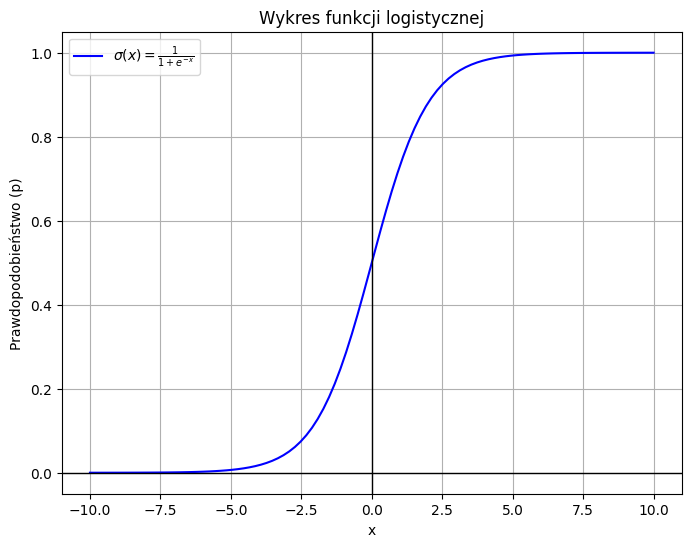

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji logistycznej
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Wartości x
x = np.linspace(-10, 10, 100)

# Obliczenie wartości funkcji logistycznej
y = sigmoid(x)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Wykres funkcji logistycznej')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Przykład obliczenia regresji logistycznej

Załóżmy, że chcemy przewidzieć prawdopodobieństwo, że klient kupi produkt ($Y = 1$),
na podstawie liczby obejrzanych stron ($X$).

Model regresji logistycznej ma postać:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Niech parametry modelu wynoszą:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Obliczmy prawdopodobieństwo zakupu, gdy klient obejrzał $X = 5$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Czyli model przewiduje, że **prawdopodobieństwo zakupu wynosi 50%**.

<br>

### 2. Dla $X = 8$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

Oznacza to, że klient, który obejrzał 8 stron, ma około **91.6% szans na zakup**.

<br>

### 3. Dla $X = 2$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 2)}} = \frac{1}{1 + e^{2.4}} \approx 0.083
$$

Zatem przy tylko 2 obejrzanych stronach, prawdopodobieństwo zakupu wynosi **8.3%**.

<br>

Widzimy, że wraz ze wzrostem liczby stron ($X$), funkcja logistyczna zwiększa
prawdopodobieństwo zakupu w sposób **nieliniowy**, ale zawsze utrzymuje wynik w zakresie $[0, 1]$.


### Różnica między regresją liniową a logistyczną

**1. Regresja liniowa**  

- Służy do przewidywania **wartości ciągłych**.  
- Model przyjmuje postać:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- Wynik $y$ może przyjmować dowolną wartość rzeczywistą.  

**2. Regresja logistyczna**  

- Służy do przewidywania **prawdopodobieństwa zdarzenia**, najczęściej klasyfikacji binarnej.  
- Model przyjmuje postać:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- Wynik $p$ zawsze mieści się w przedziale $[0,1]$.  

<br><br>

**Podsumowanie w skrócie**:

| Cecha                | Regresja liniowa         | Regresja logistyczna     |
|----------------------|------------------------|-------------------------|
| Typ zmiennej zależnej | Ciągła                 | Binarny (0/1)           |
| Wynik modelu         | Dowolna liczba rzeczywista | Prawdopodobieństwo [0,1] |
| Funkcja aktywacji    | Brak / liniowa         | Sigmoid                 |


### Przykład regresji logistycznej w kodzie Python

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


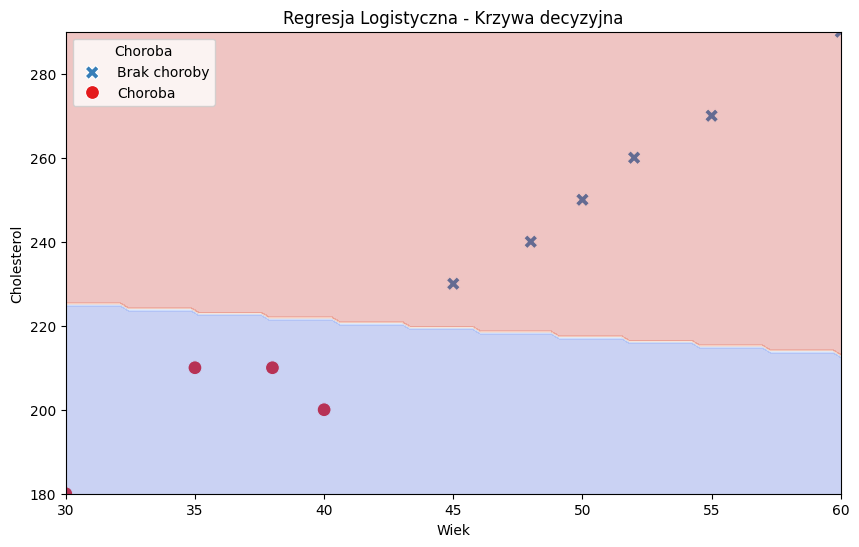

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Tworzymy przykładowe dane
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Podzielmy dane na zmienne niezależne (X) i zależną (y)
X = df[['Age', 'Cholesterol']]  # Zmienne niezależne
y = df['Has_Disease']  # Zmienna zależna

# Dzielimy dane na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidujemy wyniki na zbiorze testowym
y_pred = model.predict(X_test)

# Wizualizacja
plt.figure(figsize=(10, 6))

# Wykres rozkładu danych z oznaczeniem choroby
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Wygenerowanie wartości predykcji na podstawie modelu
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykres krzywej decyzyjnej regresji logistycznej
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Regresja Logistyczna - Krzywa decyzyjna")
plt.xlabel('Wiek')
plt.ylabel('Cholesterol')
plt.legend(title='Choroba', loc='upper left', labels=["Brak choroby", "Choroba"])
plt.show()

### Metryki oceny jakości modeli w zadaniach klasyfikacyjnych

# 1. Dokładność (Accuracy)

Dokładność mierzy, jaki odsetek przewidywań modelu jest poprawny. Jeśli mamy:

- \(TP\) – prawdziwie pozytywne (True Positive)  
- \(TN\) – prawdziwie negatywne (True Negative)  
- \(FP\) – fałszywie pozytywne (False Positive)  
- \(FN\) – fałszywie negatywne (False Negative)  

to dokładność definiuje się jako:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precyzja (Precision)

Precyzja mówi, jaki odsetek obserwacji przewidzianych jako pozytywne faktycznie jest pozytywnych:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Czułość (Recall / Sensitivity)

Czasem warto też policzyć czułość, czyli zdolność modelu do wykrywania prawdziwych pozytywów:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

F1-score to miara łącząca precyzję i czułość w jedną wartość. Jest to **harmoniczna średnia** precyzji i czułości, która uwzględnia zarówno błędy fałszywie pozytywne, jak i fałszywie negatywne.  

Definicja:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

gdzie:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score jest szczególnie przydatny, gdy klasy są niezbalansowane, ponieważ uwzględnia zarówno precyzję, jak i czułość.

<br><br>

| Miara | Definicja | Wzór |
|-------|-----------|------|
| **Dokładność (Accuracy)** | Odsetek poprawnie sklasyfikowanych przypadków | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precyzja (Precision)** | Odsetek prawdziwych pozytywów spośród przewidzianych jako pozytywne | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Czułość (Recall / Sensitivity)** | Odsetek prawdziwych pozytywów wykrytych przez model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specyficzność (Specificity)** | Odsetek prawdziwych negatywów wykrytych przez model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | Harmoniczna średnia precyzji i czułości | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |



### Przykład wykorzystania metryk dla regresji logistycznej w kodzie Python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # losowe 0 lub 1
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Podzielmy dane na zmienne niezależne (X) i zależną (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Dzielimy dane na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidujemy wyniki na zbiorze testowym
y_pred = model.predict(X_test)

# Sprawdzamy dokładność modelu
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f'Dokładność modelu: {accuracy * 100:.2f}%')
print(f'Precyzja: {precision * 100:.2f}%')
print(f'Czułość: {recall * 100:.2f}%')
print(f'f1-score: {f1 * 100:.2f}%')


Dokładność modelu: 75.00%
Precyzja: 70.59%
Czułość: 100.00%
f1-score: 82.76%


## Zadanie
Dla zbioru danych `heart_disease_uci.csv` przeprować analizę DEA oraz regresję logistyczną dla cechy `num`.

### Opis kolumn

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Pamiętaj o:
- sprawdzeniu, czy są brakujące dane,
- sprawdzeniu czy jest korelacja między cechami,
- wartościach odstających,
- sprawdzeniu poprawności modulu za pomocą metryk,
- wizualizacji danych oraz wyników.

In [ ]:
# Twój kod tutaj
# Warto dzielić je na pojedyncze bloki

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from scipy.optimize import linprog

In [52]:
# Wczytanie danych
df = pd.read_csv("/content/heart_disease_uci (1).csv", na_values=['?', ''])

# Tworzenie kolumny output (0 = brak choroby, 1 = choroba)
df['output'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

df = df.drop(columns=['id', 'num'], errors='ignore')
print("Podgląd danych:")
display(df.head())


Podgląd danych:


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [53]:
#wyświetlenie typów danych dla każdej kolumny
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  output    920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


None

In [45]:
# czy są jakieś duplikaty?
dupes = df.duplicated().sum()
print("Liczba zduplikowanych wierszy:", dupes)
dupes = df[df.duplicated(keep=False)]
display(dupes)

Liczba zduplikowanych wierszy: 2


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
404,49,Female,Hungary,atypical angina,110.0,NaN,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
405,49,Female,Hungary,atypical angina,110.0,NaN,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
859,58,Male,VA Long Beach,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,1
907,58,Male,VA Long Beach,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,1


In [54]:
print("Braki przed imputacją:", df.isna().sum().sum())

Braki przed imputacją: 1759


In [55]:
# braki danych
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
print("Braki danych w kolumnach:")
display(pd.DataFrame({"Braki": missing, "Procent [%]": missing_pct}))


Braki danych w kolumnach:


,Braki,Procent [%]
ca,611,66.41
thal,486,52.83
slope,309,33.59
fbs,90,9.78
oldpeak,62,6.74
trestbps,59,6.41
thalch,55,5.98
exang,55,5.98
chol,30,3.26
restecg,2,0.22


In [56]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,Male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,920,4,Cleveland,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,861.0,NaN,NaN,NaN,132.132404,19.06607,0.0,120.0,130.0,140.0,200.0
chol,890.0,NaN,NaN,NaN,199.130337,110.78081,0.0,175.0,223.0,268.0,603.0
fbs,830,2,False,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,918,3,normal,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,865.0,NaN,NaN,NaN,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
exang,865,2,False,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


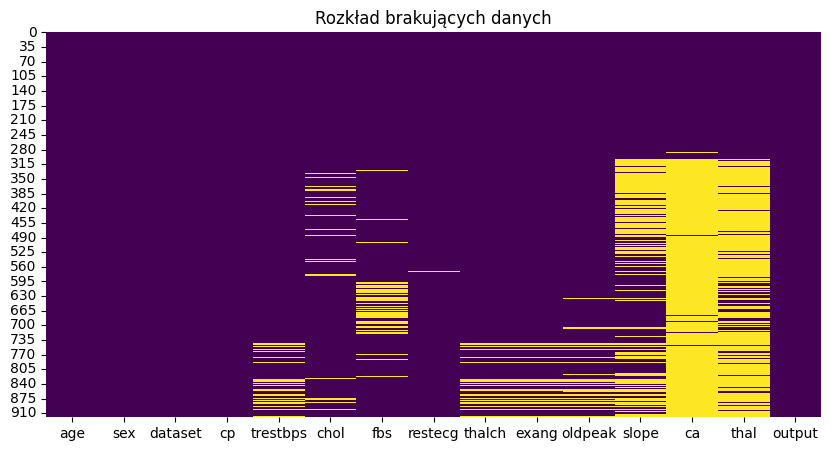

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Rozkład brakujących danych")
plt.show()


In [58]:
df_raw = df.copy()

In [59]:
# Kolumny numeryczne → medianą
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Kolumny kategoryczne → dominantą (modą)
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Braki po imputacji:", df.isna().sum().sum())


Braki po imputacji: 0


/tmp/ipython-input-3729250981.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [62]:
print("\n>>> Braki PO imputacji (łącznie):", df.isna().sum().sum())

# Porównanie liczby braków przed/po dla każdej kolumny
compare_missing = pd.DataFrame({
    "Przed imputacją": df_raw.isna().sum(),
    "Po imputacji": df.isna().sum()
})
compare_missing["Różnica"] = compare_missing["Przed imputacją"] - compare_missing["Po imputacji"]

print("\nPorównanie liczby braków przed i po imputacji:")
display(compare_missing[compare_missing["Przed imputacją"] > 0])


>>> Braki PO imputacji (łącznie): 0

Porównanie liczby braków przed i po imputacji:


,Przed imputacją,Po imputacji,Różnica
trestbps,59,0,59
chol,30,0,30
fbs,90,0,90
restecg,2,0,2
thalch,55,0,55
exang,55,0,55
oldpeak,62,0,62
slope,309,0,309
ca,611,0,611
thal,486,0,486


In [63]:
df_raw.describe()  # przed
df.describe()      # po imputacji

,age,trestbps,chol,thalch,oldpeak,ca,output
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.553261
std,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


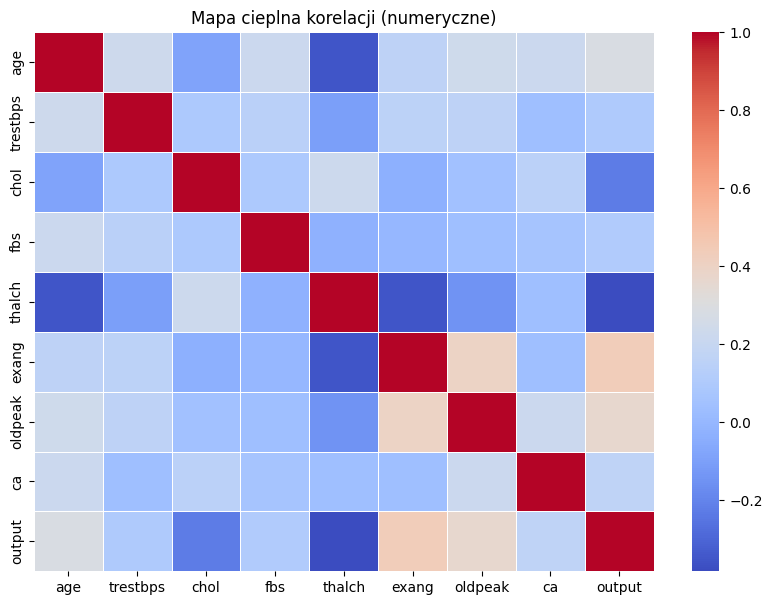

Korelacje względem 'output' (malejąco):


,output
output,1.000
exang,0.434
oldpeak,0.366
age,0.283
ca,0.165
fbs,0.108
trestbps,0.101
chol,-0.229
thalch,-0.382


In [75]:
# Korelacje tylko dla zmiennych numerycznych (po imputacji)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 7))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa cieplna korelacji (numeryczne)")
plt.show()

# Korelacje względem zmiennej docelowej (output)
print("Korelacje względem 'output' (malejąco):")
display(corr['output'].sort_values(ascending=False).round(3))


=== ANALIZA EDA ===

Statystyki opisowe:
               id         age         sex     dataset          cp    trestbps  \
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000   
mean   406.598649   53.097297    0.764865    1.002703    0.787838  132.754054   
std    259.907071    9.408127    0.424370    1.085016    0.950529   18.581250   
min      1.000000   28.000000    0.000000    0.000000    0.000000    0.000000   
25%    185.750000   46.000000    1.000000    0.000000    0.000000  120.000000   
50%    377.500000   54.000000    1.000000    1.000000    0.000000  130.000000   
75%    588.250000   60.000000    1.000000    1.000000    2.000000  140.000000   
max    920.000000   77.000000    1.000000    3.000000    3.000000  200.000000   

             chol         fbs     restecg      thalch       exang     oldpeak  \
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000   
mean   220.136486    0.150000    0.925676  138.744595    0.400000  

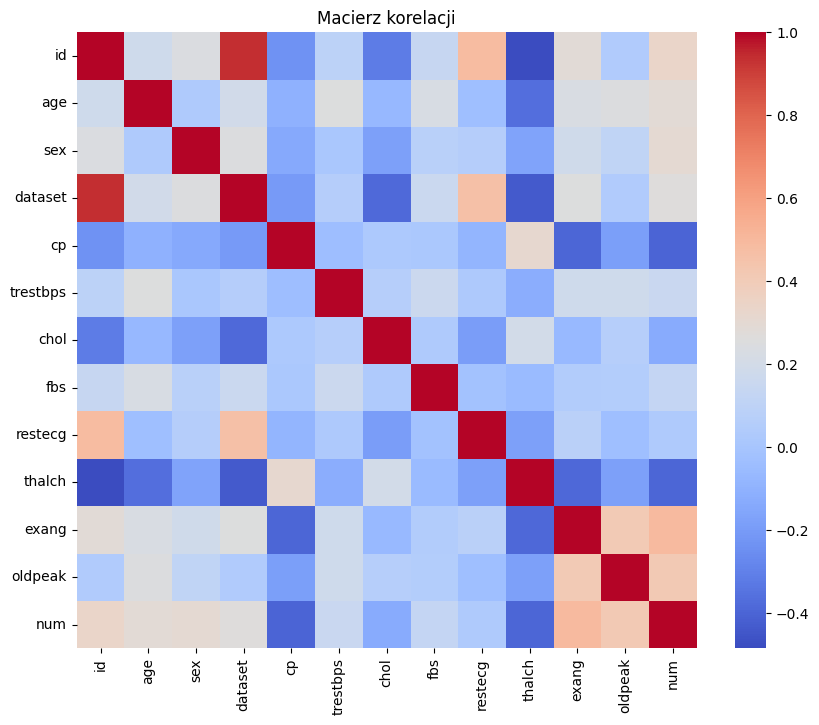

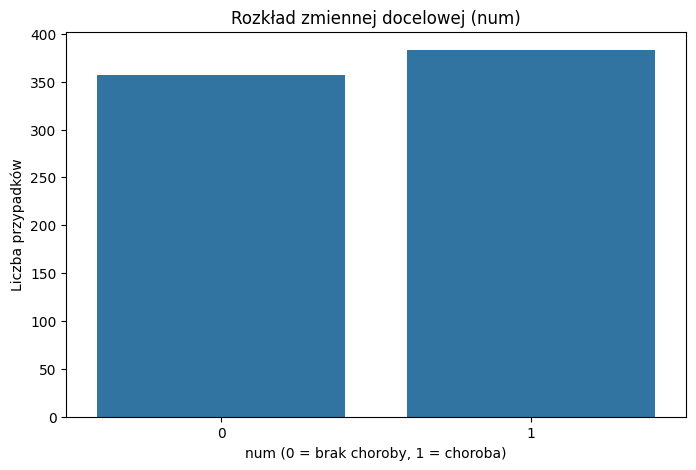

=== ANALIZA DEA ===


=== ANALIZA DEA WYNIKI ===

Średnia efektywność: 0.5388137544955667
Minimalna efektywność: 0.23384053415130604
Maksymalna efektywność: 1.0


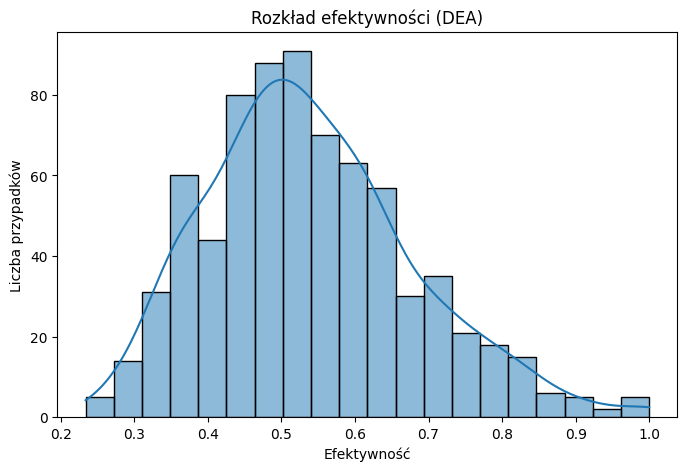


=== REGRESJA LOGISTYCZNA ===


--- Metryki oceny modelu ---
Dokładność (Accuracy): 0.8595
Precyzja (Precision): 0.8431
Czułość (Recall): 0.8958
F1-score: 0.8687
AUC (Area Under ROC Curve): 0.9285

--- Macierz konfuzji ---


,Przewidziana Klasa 0,Przewidziana Klasa 1
Rzeczywista Klasa 0,73,16
Rzeczywista Klasa 1,10,86



--- Raport klasyfikacji ---
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.84      0.90      0.87        96

    accuracy                           0.86       185
   macro avg       0.86      0.86      0.86       185
weighted avg       0.86      0.86      0.86       185



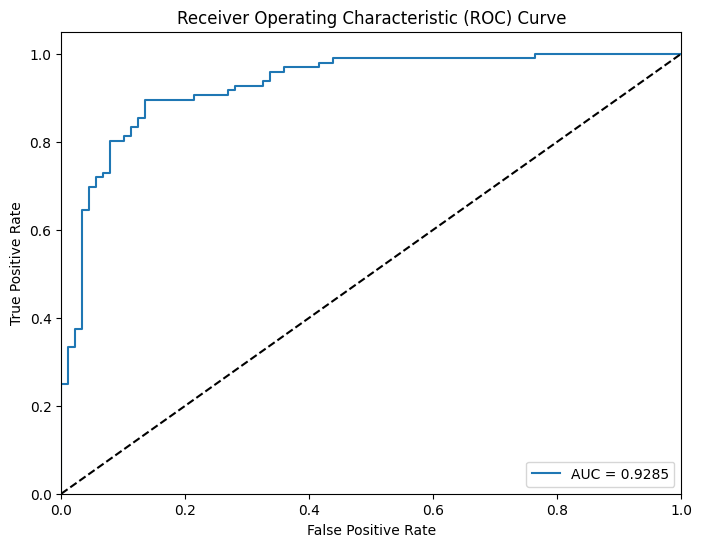

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.optimize import linprog


df = pd.read_csv("/content/heart_disease_uci (1).csv")
data = df.copy()
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
data = data.drop(columns=['ca', 'thal', 'slope'], errors='ignore')
data = data.dropna()

cat_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

print("=== ANALIZA EDA ===\n")


print("Statystyki opisowe:")
print(data.describe(), "\n")


corr = data.corr(numeric_only=True)
print("Korelacja z cechą 'num':")
print(corr['num'].sort_values(ascending=False), "\n")


plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Macierz korelacji")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=data)
plt.title("Rozkład zmiennej docelowej (num)")
plt.xlabel("num (0 = brak choroby, 1 = choroba)")
plt.ylabel("Liczba przypadków")
plt.show()

print("=== ANALIZA DEA ===\n")

inputs = data[['age', 'trestbps', 'chol']].values
outputs = data[['thalch']].values

n, m_in = inputs.shape
m_out = outputs.shape[1]
efficiency = []

for i in range(n):
    c = np.zeros(n + 1)
    c[-1] = 1

    A_ub_in = np.hstack([inputs.T, -inputs[i].reshape(-1, 1)])
    b_ub_in = np.zeros(m_in)

    A_ub_out = np.hstack([-outputs.T, np.zeros((m_out, 1))])
    b_ub_out = -outputs[i]

    A_ub = np.vstack([A_ub_in, A_ub_out])
    b_ub = np.concatenate([b_ub_in, b_ub_out])

    bounds = [(0, None)] * (n + 1)

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
    eff = res.x[-1] if res.success else 0 # Corrected incomplete line
    efficiency.append(eff)

data['efficiency'] = efficiency

print("\n=== ANALIZA DEA WYNIKI ===\n")
print("Średnia efektywność:", np.mean(efficiency))
print("Minimalna efektywność:", np.min(efficiency))
print("Maksymalna efektywność:", np.max(efficiency))

plt.figure(figsize=(8, 5))
sns.histplot(data['efficiency'], kde=True)
plt.title("Rozkład efektywności (DEA)")
plt.xlabel("Efektywność")
plt.ylabel("Liczba przypadków")
plt.show()

print("\n=== REGRESJA LOGISTYCZNA ===\n")

X = data.drop('num', axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Metryki oceny modelu ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Dokładność (Accuracy): {accuracy:.4f}")
print(f"Precyzja (Precision): {precision:.4f}")
print(f"Czułość (Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC (Area Under ROC Curve): {roc_auc:.4f}")

print("\n--- Macierz konfuzji ---")
cm = confusion_matrix(y_test, y_pred)
display(pd.DataFrame(cm, index=['Rzeczywista Klasa 0', 'Rzeczywista Klasa 1'], columns=['Przewidziana Klasa 0', 'Przewidziana Klasa 1']))

print("\n--- Raport klasyfikacji ---")
print(classification_report(y_test, y_pred, zero_division=0))

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()